Import required libraries



In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

 Load the dataset

In [2]:
import os
os.getcwd()

'/content'

In [3]:
os.listdir()

['.config', 'drive', 'sample_data']

In [4]:
os.listdir("/content/drive/My Drive")

['Colab Notebooks',
 'EVISION ENROLLMENT PROCESS.pdf',
 'Coursework Assessment 1.pdf',
 'basantasir.week9.pdf.docx',
 'CEASER_cipher.py',
 'AI',
 'HDI_Assignment',
 'Final Portfolio 2026 Instructions - Biratnagar.pdf',
 'FuelConsumption .csv',
 'Testing_indian_liver_disease_dataset.csv']

In [5]:
import pandas as pd

df = pd.read_csv(
    "/content/drive/My Drive/Testing_indian_liver_disease_dataset.csv"
)

df.head()

,Patient_ID,Age,Gender,Occupation,BMI,Obesity_Class,Diet_Quality,Physical_Activity,Sleep_Hours,Smoking_Status,...,Comorb_Diabetes,Comorb_Hypertension,Comorb_Genetic_History,ALT,AST,Bilirubin,Albumin,Platelets,Alk_Phosphatase,Liver_Disease_Type
0,P1117,73,Male,Office Worker,30.6,Obesity I,Healthy,Sedentary,8.8,Never,...,0,1,0,56.26,85.85,2.19,3.98,294,111,Cirrhosis
1,P1369,35,Female,Retired,23.5,Normal,Healthy,Moderate,9.0,Never,...,0,0,0,18.19,44.53,0.99,4.49,241,115,Normal
2,P0423,36,Female,Student,25.3,Overweight,Healthy,Sedentary,6.8,Never,...,1,0,0,25.47,40.20,0.34,4.72,319,117,Fatty_Liver
3,P0414,36,Male,Laborer,15.0,Underweight,Healthy,Low,6.6,Never,...,0,0,0,54.57,42.13,0.69,3.48,170,99,Fatty_Liver
4,P0452,50,Female,Retired,30.0,Obesity I,Healthy,Low,6.3,Never,...,0,1,0,15.00,34.57,1.00,3.51,329,119,Fatty_Liver


BASIC DATA UNDERSTANDING

Checking dataset shape

In [6]:
df.shape

(1500, 28)

Checking column names

In [7]:
df.columns

Index(['Patient_ID', 'Age', 'Gender', 'Occupation', 'BMI', 'Obesity_Class',
       'Diet_Quality', 'Physical_Activity', 'Sleep_Hours', 'Smoking_Status',
       'Alcohol_Consumption', 'Sym_Fatigue', 'Sym_Jaundice',
       'Sym_Abdominal_Pain', 'Sym_Itching', 'Sym_Ascites', 'Sym_Dark_Urine',
       'Sym_Weight_Loss', 'Comorb_Diabetes', 'Comorb_Hypertension',
       'Comorb_Genetic_History', 'ALT', 'AST', 'Bilirubin', 'Albumin',
       'Platelets', 'Alk_Phosphatase', 'Liver_Disease_Type'],
      dtype='object')

Checking data types

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 28 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Patient_ID              1500 non-null   object 
 1   Age                     1500 non-null   int64  
 2   Gender                  1500 non-null   object 
 3   Occupation              1500 non-null   object 
 4   BMI                     1500 non-null   float64
 5   Obesity_Class           1500 non-null   object 
 6   Diet_Quality            1500 non-null   object 
 7   Physical_Activity       1500 non-null   object 
 8   Sleep_Hours             1500 non-null   float64
 9   Smoking_Status          1500 non-null   object 
 10  Alcohol_Consumption     822 non-null    object 
 11  Sym_Fatigue             1500 non-null   int64  
 12  Sym_Jaundice            1500 non-null   int64  
 13  Sym_Abdominal_Pain      1500 non-null   int64  
 14  Sym_Itching             1500 non-null   

CHECKING MISSING VALUES

In [9]:
df.isnull().sum()

,0
Patient_ID,0
Age,0
Gender,0
Occupation,0
BMI,0
Obesity_Class,0
Diet_Quality,0
Physical_Activity,0
Sleep_Hours,0
Smoking_Status,0


EXPLORATORY DATA ANALYSIS

Distribution of Target Variable


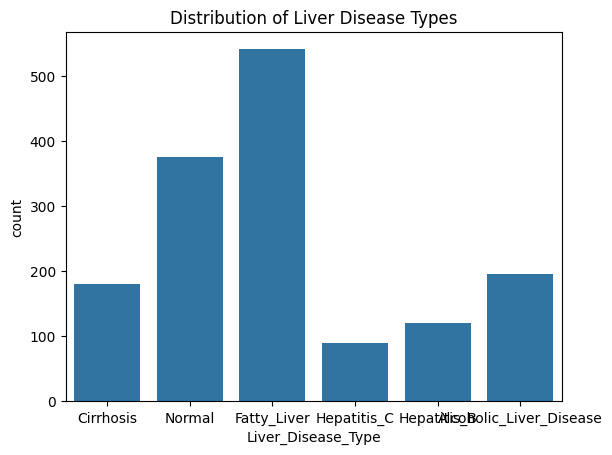

In [10]:
sns.countplot(x='Liver_Disease_Type', data=df)
plt.title("Distribution of Liver Disease Types")
plt.show()

Numerical feature distributions

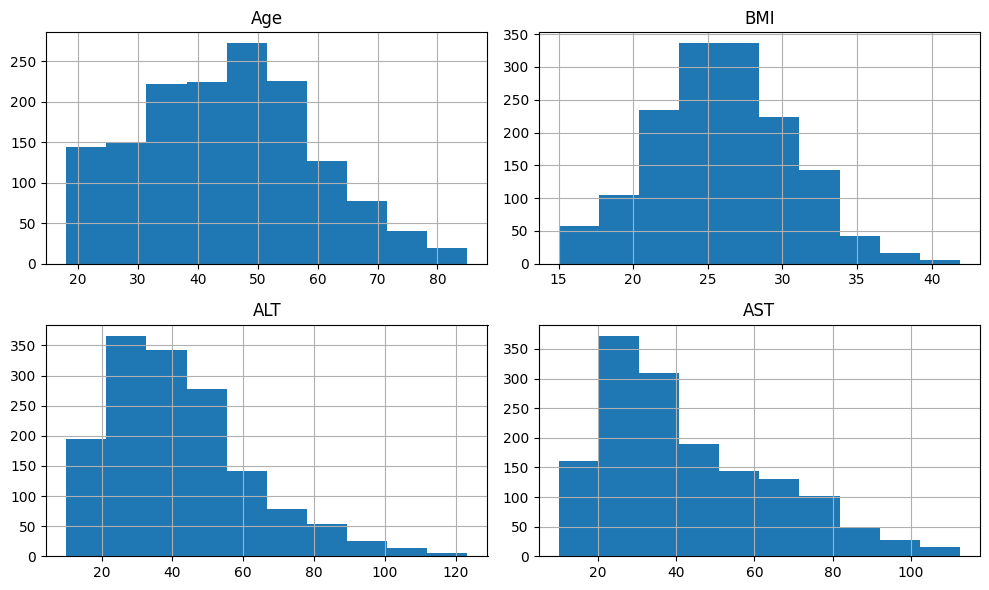

In [11]:
df[['Age', 'BMI', 'ALT', 'AST']].hist(figsize=(10,6))
plt.tight_layout()
plt.show()

Correlation heatmap

PREPARE DATA FOR MODELS

In [12]:
import numpy as np

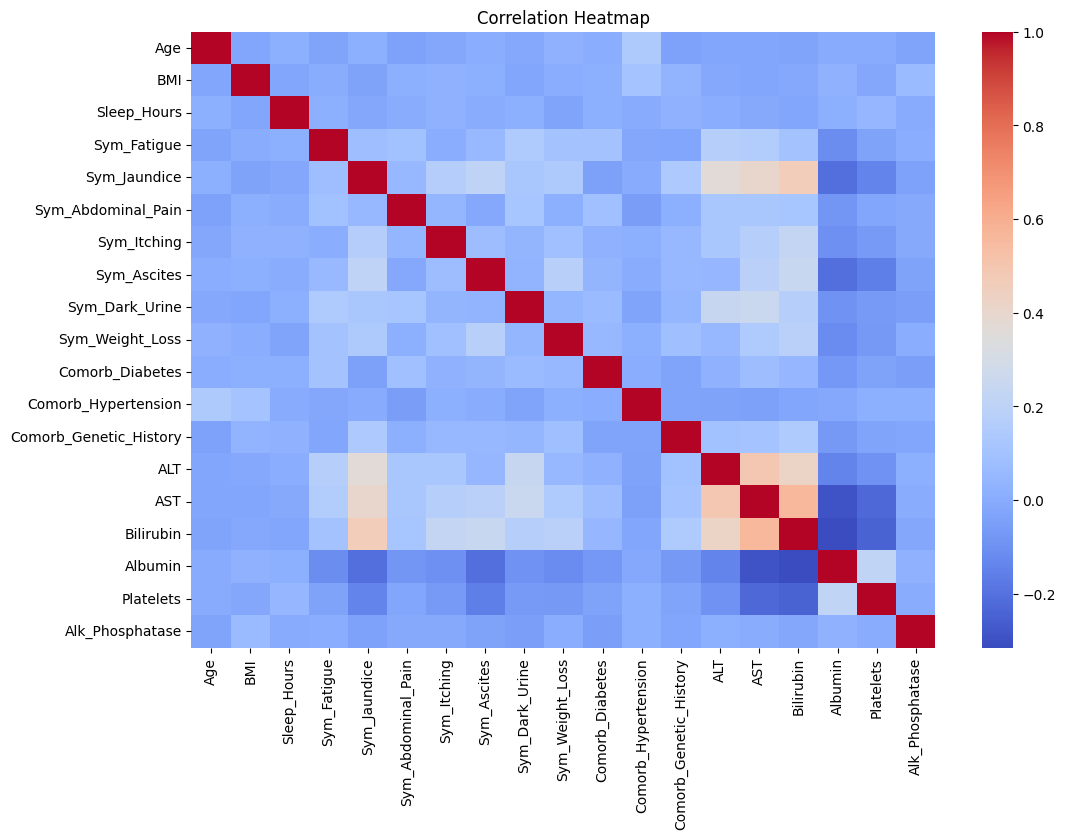

In [13]:
plt.figure(figsize=(12,8))
sns.heatmap(df.select_dtypes(include=np.number).corr(), cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

Feature vs target relationship

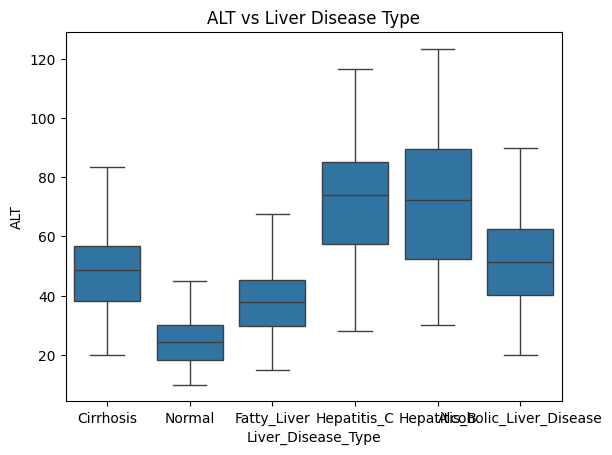

In [14]:
sns.boxplot(x='Liver_Disease_Type', y='ALT', data=df)
plt.title("ALT vs Liver Disease Type")
plt.show()

Define Features (X) and Target (y)

In [15]:
y = df['Liver_Disease_Type']
X = df.drop(['Liver_Disease_Type', 'Patient_ID'], axis=1)

print(X.shape)
print(y.shape)

(1500, 26)
(1500,)


Encode categorical variables

In [16]:
X = pd.get_dummies(X, drop_first=True)

Train–Test Split

In [17]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42
)

In [18]:
X = pd.get_dummies(X, drop_first=True)

Feature Scaling

In [19]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

Train Classification Models

In [20]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(max_iter=1000)
lr.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

Random Forest Classifier

In [21]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

Neural Network (MLP)

In [22]:
from sklearn.neural_network import MLPClassifier

mlp = MLPClassifier(
    hidden_layer_sizes=(64, 32),
    max_iter=500,
    random_state=42
)

mlp.fit(X_train, y_train)

MLPClassifier(hidden_layer_sizes=(64, 32), max_iter=500, random_state=42)

Model Evaluation

In [23]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

def evaluate_model(model, name):
    y_pred = model.predict(X_test)
    print(f"\n{name}")
    print("Accuracy:", accuracy_score(y_test, y_pred))
    print("Precision:", precision_score(y_test, y_pred, average='weighted'))
    print("Recall:", recall_score(y_test, y_pred, average='weighted'))
    print("F1 Score:", f1_score(y_test, y_pred, average='weighted'))
    print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

In [24]:
evaluate_model(lr, "Logistic Regression")
evaluate_model(rf, "Random Forest")
evaluate_model(mlp, "Neural Network (MLP)")


Logistic Regression
Accuracy: 0.7666666666666667
Precision: 0.7750392199562751
Recall: 0.7666666666666667
F1 Score: 0.7643233483216195
Confusion Matrix:
 [[30  4  7  4  2  0]
 [ 2 23  2  2  0  0]
 [ 2  0 98  0  0 11]
 [ 0  3  1 13  3  0]
 [ 1  2  1  9  9  0]
 [ 0  0 14  0  0 57]]

Random Forest
Accuracy: 0.8
Precision: 0.8028426197458456
Recall: 0.8
F1 Score: 0.7937750816556233
Confusion Matrix:
 [[ 38   1   5   3   0   0]
 [  1  25   3   0   0   0]
 [  0   0 104   0   0   7]
 [  3   3   1  10   3   0]
 [  2   2   1   9   8   0]
 [  0   0  16   0   0  55]]

Neural Network (MLP)
Accuracy: 0.7533333333333333
Precision: 0.754270455946762
Recall: 0.7533333333333333
F1 Score: 0.7502319784967627
Confusion Matrix:
 [[30  5  6  3  3  0]
 [ 3 23  1  2  0  0]
 [ 5  0 97  0  0  9]
 [ 0  2  0 12  5  1]
 [ 1  2  2 10  7  0]
 [ 0  0 14  0  0 57]]


Hyperparameter Tuning

In [25]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [50, 100],
    'max_depth': [None, 10, 20]
}

grid = GridSearchCV(
    RandomForestClassifier(random_state=42),
    param_grid,
    cv=3,
    scoring='accuracy'
)

grid.fit(X_train, y_train)

print("Best Parameters:", grid.best_params_)

Best Parameters: {'max_depth': 20, 'n_estimators': 50}


In [26]:
best_rf = grid.best_estimator_
evaluate_model(best_rf, "Tuned Random Forest")


Tuned Random Forest
Accuracy: 0.8033333333333333
Precision: 0.811908383576394
Recall: 0.8033333333333333
F1 Score: 0.7980022709530906
Confusion Matrix:
 [[ 36   1   7   3   0   0]
 [  2  25   2   0   0   0]
 [  0   0 105   0   0   6]
 [  2   4   1  11   2   0]
 [  1   2   2   8   9   0]
 [  0   0  16   0   0  55]]
